In [61]:

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import joblib

In [65]:
df = pd.read_csv('Telco-Customer-Churn.csv')  # Replace with your path
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST0,Male,1,Yes,No,6,No,Yes,No,Yes,...,No internet service,Yes,Yes,No internet service,Month-to-month,Yes,Bank transfer (automatic),70.32,6389.81,Yes
1,CUST1,Female,0,No,No,34,No,No phone service,Fiber optic,No internet service,...,No,No,No,No,Two year,No,Mailed check,66.48,3475.93,No
2,CUST2,Male,0,No,No,54,Yes,No phone service,No,Yes,...,No internet service,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),119.75,7341.85,Yes
3,CUST3,Male,0,No,No,13,No,No phone service,Fiber optic,Yes,...,Yes,No,No internet service,No,Two year,No,Mailed check,69.35,3611.99,No
4,CUST4,Male,0,No,Yes,9,No,No phone service,No,Yes,...,No internet service,Yes,No,Yes,Month-to-month,No,Mailed check,37.84,5959.54,No


In [85]:
print(df.shape)
print(df.info())
print(df.isnull().sum())
print(df.duplicated().sum())

(1000, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1000 non-null   object 
 1   gender            1000 non-null   object 
 2   SeniorCitizen     1000 non-null   int64  
 3   Partner           1000 non-null   object 
 4   Dependents        1000 non-null   object 
 5   tenure            1000 non-null   int64  
 6   PhoneService      1000 non-null   object 
 7   MultipleLines     1000 non-null   object 
 8   InternetService   1000 non-null   object 
 9   OnlineSecurity    1000 non-null   object 
 10  OnlineBackup      1000 non-null   object 
 11  DeviceProtection  1000 non-null   object 
 12  TechSupport       1000 non-null   object 
 13  StreamingTV       1000 non-null   object 
 14  StreamingMovies   1000 non-null   object 
 15  Contract          1000 non-null   object 
 16  PaperlessBilling  1000 non-null 

In [89]:
df.drop('customerID',axis=1,inplace=True)

In [93]:
df['TotalCharges']= pd.to_numeric(df['TotalCharges'],errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace= True)

C:\Users\manav\AppData\Local\Temp\ipykernel_38208\354959634.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace= True)


In [95]:
label_encoder= LabelEncoder()
df['Churn']= label_encoder.fit_transform(df['Churn'])

In [97]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,1,Yes,No,6,No,Yes,No,Yes,Yes,No internet service,Yes,Yes,No internet service,Month-to-month,Yes,Bank transfer (automatic),70.32,6389.81,1
1,Female,0,No,No,34,No,No phone service,Fiber optic,No internet service,Yes,No,No,No,No,Two year,No,Mailed check,66.48,3475.93,0
2,Male,0,No,No,54,Yes,No phone service,No,Yes,Yes,No internet service,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),119.75,7341.85,1
3,Male,0,No,No,13,No,No phone service,Fiber optic,Yes,No,Yes,No,No internet service,No,Two year,No,Mailed check,69.35,3611.99,0
4,Male,0,No,Yes,9,No,No phone service,No,Yes,No internet service,No internet service,Yes,No,Yes,Month-to-month,No,Mailed check,37.84,5959.54,0


In [99]:
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [101]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,1,1,0,6,0,2,2,2,2,1,2,2,1,0,1,0,70.32,6389.81,1
1,0,0,0,0,34,0,1,1,1,2,0,0,0,0,2,0,3,66.48,3475.93,0
2,1,0,0,0,54,1,1,2,2,2,1,0,2,2,0,1,1,119.75,7341.85,1
3,1,0,0,0,13,0,1,1,2,0,2,0,1,0,2,0,3,69.35,3611.99,0
4,1,0,0,1,9,0,1,2,2,1,1,2,0,2,0,0,3,37.84,5959.54,0


In [103]:
scaler = StandardScaler()
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [105]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,1,1,0,-1.460799,0,2,2,2,2,1,2,2,1,0,1,0,-0.032417,1.013674,1
1,0,0,0,0,-0.082315,0,1,1,1,2,0,0,0,0,2,0,3,-0.166556,-0.228003,0
2,1,0,0,0,0.902316,1,1,2,2,2,1,0,2,2,0,1,1,1.694279,1.419362,1
3,1,0,0,0,-1.116178,0,1,1,2,0,2,0,1,0,2,0,3,-0.066301,-0.170024,0
4,1,0,0,1,-1.313104,0,1,2,2,1,1,2,0,2,0,0,3,-1.167013,0.830325,0


In [107]:
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [109]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,1,1,0,-1.460799,0,2,2,2,2,1,2,2,1,0,1,0,-0.032417,1.013674,1
1,0,0,0,0,-0.082315,0,1,1,1,2,0,0,0,0,2,0,3,-0.166556,-0.228003,0
2,1,0,0,0,0.902316,1,1,2,2,2,1,0,2,2,0,1,1,1.694279,1.419362,1
3,1,0,0,0,-1.116178,0,1,1,2,0,2,0,1,0,2,0,3,-0.066301,-0.170024,0
4,1,0,0,1,-1.313104,0,1,2,2,1,1,2,0,2,0,0,3,-1.167013,0.830325,0


In [111]:
rf = RandomForestClassifier(random_state=42)
params = {'n_estimators': [100, 200], 'max_depth': [5, 10]}
gs = GridSearchCV(rf, params, cv=3, scoring='accuracy')
gs.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10], 'n_estimators': [100, 200]},
             scoring='accuracy')

In [113]:
best_model = gs.best_estimator_

In [124]:
y_pred = best_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, best_model.predict_proba(X_test)[:,1]))

[[34 61]
 [40 65]]
              precision    recall  f1-score   support

           0       0.46      0.36      0.40        95
           1       0.52      0.62      0.56       105

    accuracy                           0.49       200
   macro avg       0.49      0.49      0.48       200
weighted avg       0.49      0.49      0.49       200

ROC AUC Score: 0.5243107769423558


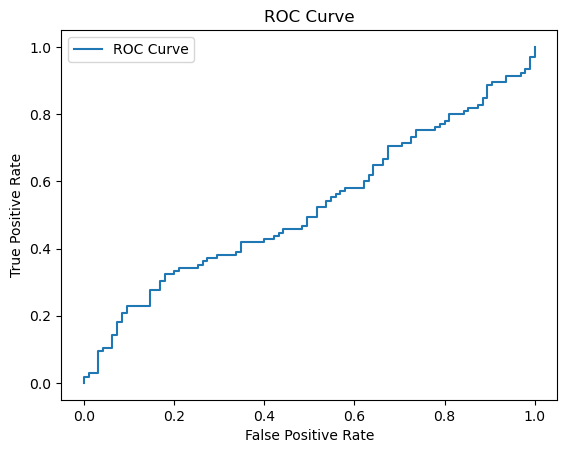

In [126]:
fpr, tpr, _ = roc_curve(y_test, best_model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [128]:
joblib.dump(best_model, 'customer_churn_model.pkl')

['customer_churn_model.pkl']